# METAR/TAF - Exploratory data analysis

## Analysis of one year, one airport data

The SBGR (Guarulhos, SP, Brazil airport) wind data from 2017 present some outliers, as the TAF and METAR messages have maximum wind speeds of 99kt. 

$1 kt = 0.514 m/s$

$99 kt = 50.93 m/s$

Messages samples:

**METAR SBRJ 231200Z 31015G27KT 280V350 4000 -RA SCT020 BKN120 25/20 Q1012 =**

**TAF SBAR 232200Z 2400/2412 12010KT 9000 SCT018 TN24/2407Z TX26/2411Z RMK PEI=**

ref: https://www.redemet.aer.mil.br

In [47]:
import os
import pandas as pd
import numpy as np

db_dir ='../3.DBGenerator/output' 
df = pd.read_csv('../3.DBGenerator/output/2017/SBGR_2017.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2016/SBGR_2016.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2015/SBGR_2015.csv',index_col=0,parse_dates=[0])
df = df.dropna(axis=0, how='any') # remove empty values
df.head(n=100)

,metar_wind,metar_TS,metar_GRGS,metar_CB,metar_TCU,taf_wind,taf_TS,taf_GRGS,taf_CB,taf_TCU
2017-01-01 00:00:00,10.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 01:00:00,7.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 02:00:00,6.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 03:00:00,8.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 04:00:00,5.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 05:00:00,6.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 06:00:00,6.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 07:00:00,7.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 08:00:00,4.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 09:00:00,4.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0


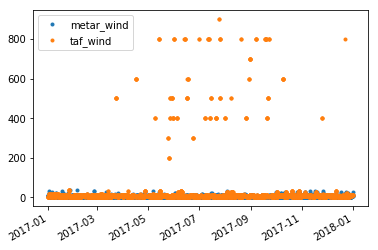

In [5]:
df.plot(y=["metar_wind","taf_wind"],style='.')

### Plot after clearing outliers

TAF and METAR data from 2017 (SBGR) were plotted, after clearing outliers.
This plot wasn't useful for comparison between predicted and measured wind speeds.

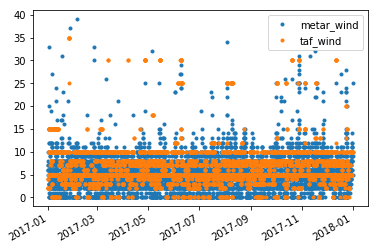

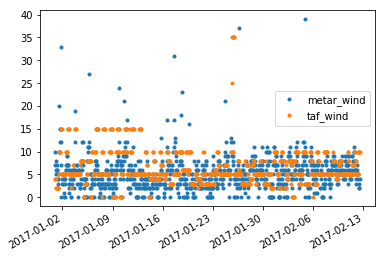

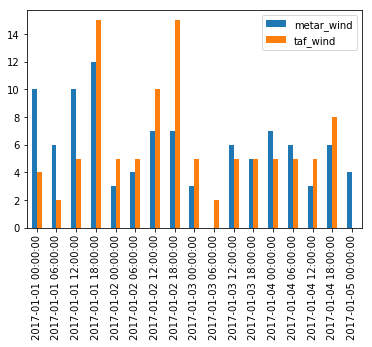

In [48]:
#clean data >99 (trash data), max 99kt on metar/taf messages
df = df[df.taf_wind<99]
df.plot(y=["metar_wind","taf_wind"],style='.')
df[0:1000].plot(y=["metar_wind","taf_wind"],style='.')
df[0:100:6].plot.bar(y=["metar_wind","taf_wind"],style='.')

## Scatter plot of one year, one airport data

The scatter plot below shows that, for low airspeeds, the prediction is fairly accurate, and this condition is the most frequent. For higher measured or predicted wind speeds, the accuracy of the prediction is compromised.

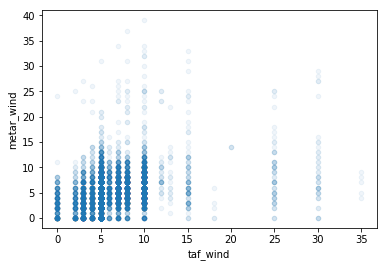

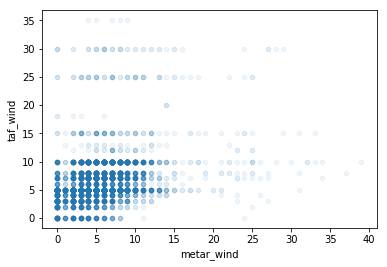

In [50]:
df.plot.scatter(x='taf_wind',  y='metar_wind',alpha=1/15)
df.plot.scatter(x='metar_wind',y='taf_wind',alpha=1/15)

### Error RMS

It's possible to see, from the RMS of the error, that, indeed, the error on low wind speeds is reduced. Up to 4kt, the RMS of the error is 4.26 and from 5kt to 9kt, it's 3.5. Even though the complete data RMS error is quite low (4.33), the RMS error for wind speeds of more than 10kt increases rapidly.

Total RMS_wind = 4.33
RMS_wind [0,4] = 4.26 on 3872 (45.74%)
RMS_wind [5,9] = 3.5 on 3920 (46.31%)
RMS_wind [10,14] = 5.65 on 558 (6.59%)
RMS_wind [15,19] = 9.32 on 46 (0.54%)
RMS_wind [20,24] = 13.7 on 32 (0.38%)
RMS_wind [25,29] = 15.2 on 25 (0.30%)
RMS_wind [30,34] = 22.3 on 10 (0.12%)
RMS_wind [35,39] = 29.0 on 2 (0.02%)


<BarContainer object of 8 artists>

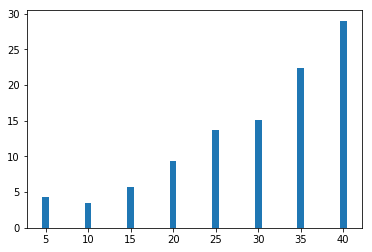

In [83]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import bar

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(df.metar_wind, df.taf_wind))
print("Total RMS_wind = {:.3}".format(rms))

delta = 5
metar_wind_max = int(df.metar_wind.max()) + 5
last = 0
vrms = []
vpct = []
for i in range(5,metar_wind_max,delta):
    ndf = df[df.metar_wind.between(last,i-1)]
    rms = np.sqrt(mean_squared_error(ndf.metar_wind, ndf.taf_wind))
    pct = len(ndf)/len(df)
    print("RMS_wind [{},{}] = {:.3} on {} ({:.2%})".format(last,i-1,rms,len(ndf),pct))
    vrms.append(rms)
    vpct.append(pct*100)
    last = i
bar(range(5,metar_wind_max,delta),vrms)

### Histogram

The histogram for the TAF data is centered slightly to the right of the METAR data.

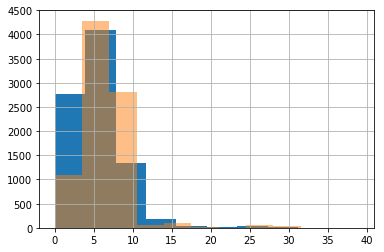

In [91]:
df.metar_wind.hist()
df.taf_wind.hist(alpha=0.5)

## Scatter plot with other variables

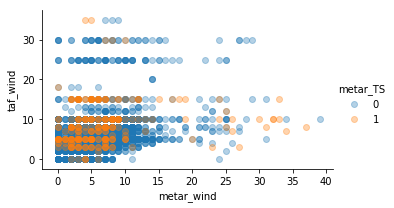

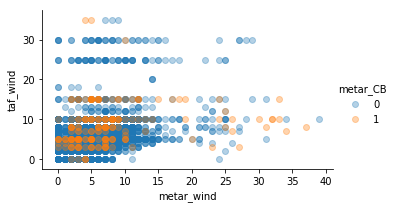

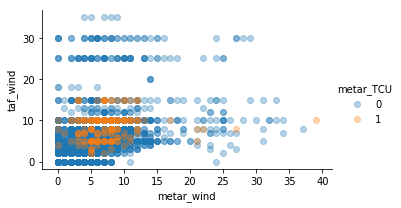

In [123]:
import seaborn 
from  matplotlib import pyplot
fg = seaborn.FacetGrid(data=df, hue='metar_TS', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=1/3).add_legend()

#df[df.metar_TS==1].plot.scatter(x='metar_wind',y='taf_wind',color='red',alpha=1/5)
#df[df.metar_TS==0].plot.scatter(x='metar_wind',y='taf_wind',color='blue',alpha=1/5)

fg = seaborn.FacetGrid(data=df, hue='metar_CB', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=1/3).add_legend()

fg = seaborn.FacetGrid(data=df, hue='metar_TCU', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=1/3).add_legend()

